In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import csv, pydot, graphviz
print('Pandas version: ', pd.__version__)
print('Numpy version: ', np.__version__)

2022-08-13 16:09:51.765581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-13 16:09:51.765622: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Pandas version:  1.4.3
Numpy version:  1.23.0


In [2]:
data=pd.read_csv('../dataset/TPE_model_features.csv')
data = data.loc[data['鄉鎮市區'] == '萬華區']
data.insert(80, 'y', data['單價元平方公尺'])
data.drop(['單價元平方公尺'],axis=1,inplace=True)
data.head()

,Unnamed: 0.1,Unnamed: 0,鄉鎮市區,交易年份,屋齡,交易標的,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位類別,...,NEAR_LRT_250,NEAR_LRT_500,NEAR_LRT_750,NEAR_MRT_250,NEAR_MRT_500,NEAR_MRT_750,NEAR_TRA_250,NEAR_TRA_500,NEAR_TRA_750,y
1,1,1,萬華區,107,2.0,1,3,2,2,1,...,0,0,0,0,1,1,0,1,1,170308
53,53,53,萬華區,108,32.0,0,3,2,2,0,...,0,0,0,0,0,0,0,0,1,136042
63,63,63,萬華區,108,9.0,1,3,2,2,2,...,0,0,0,0,1,1,0,0,1,168943
110,110,110,萬華區,108,7.0,1,3,2,2,4,...,0,0,0,0,0,0,0,0,0,127269
138,138,138,萬華區,108,17.0,1,3,2,2,3,...,0,0,0,0,1,1,0,0,1,149150


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2761 entries, 1 to 42816
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2761 non-null   int64  
 1   Unnamed: 0            2761 non-null   int64  
 2   鄉鎮市區                  2761 non-null   object 
 3   交易年份                  2761 non-null   int64  
 4   屋齡                    2761 non-null   float64
 5   交易標的                  2761 non-null   int64  
 6   建物現況格局-房              2761 non-null   int64  
 7   建物現況格局-廳              2761 non-null   int64  
 8   建物現況格局-衛              2761 non-null   int64  
 9   車位類別                  2761 non-null   int64  
 10  電梯                    2761 non-null   int64  
 11  floor                 2761 non-null   int64  
 12  geometry              2761 non-null   object 
 13  NEAR_HOSTIPAL_250     2761 non-null   int64  
 14  NEAR_HOSTIPAL_500     2761 non-null   int64  
 15  NEAR_HOSTIPAL_750   

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['Unnamed: 0.1'],axis=1,inplace=True)
data.drop(['鄉鎮市區'],axis=1,inplace=True)
data.drop(['geometry'],axis=1,inplace=True)
#data = data[['交易年份','屋齡','交易標的','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位類別','電梯','floor','NEAR_HOSTIPAL_500','CLINIC_COUNT_500','DENTIST_COUNT_500','PHARMACY_COUNT_500','CSTORE_COUNT_500','FASTFOOD_COUNT_500','LIBRARY_COUNT_500','NEAR_UNIVERSITY_500','NEAR_FIRESTATION_500','NEAR_FUEL_500','NEAR_MARKET_500','NEAR_POLICE_500','TEMPLE_COUNT_500','CEMETERY_AREA_500','WATER_AREA_500','PARKING_AREA_500','STOP_COUNT_500','NEAR_MRT_500','y']]
data.dtypes

交易年份              int64
屋齡              float64
交易標的              int64
建物現況格局-房          int64
建物現況格局-廳          int64
                 ...   
NEAR_MRT_750      int64
NEAR_TRA_250      int64
NEAR_TRA_500      int64
NEAR_TRA_750      int64
y                 int64
Length: 76, dtype: object

In [5]:
# 刪除標準差為0的欄位
data.drop(['NEAR_SCHOOL_500'],axis=1,inplace=True)
data.drop(['NEAR_SCHOOL_250'],axis=1,inplace=True)
data.drop(['NEAR_SCHOOL_750'],axis=1,inplace=True)
data.drop(['NEAR_MARKET_250'],axis=1,inplace=True)
data.drop(['NEAR_MARKET_500'],axis=1,inplace=True)
data.drop(['NEAR_MARKET_750'],axis=1,inplace=True)
data.drop(['NEAR_LRT_250'],axis=1,inplace=True)
data.drop(['NEAR_LRT_500'],axis=1,inplace=True)
data.drop(['NEAR_LRT_750'],axis=1,inplace=True)
data.drop(['CEMETERY_AREA_250'],axis=1,inplace=True)
data.drop(['CEMETERY_AREA_500'],axis=1,inplace=True)
data.drop(['CEMETERY_AREA_750'],axis=1,inplace=True)
data.drop(['NEAR_POLICE_250'],axis=1,inplace=True)
data.drop(['NEAR_POLICE_500'],axis=1,inplace=True)
data.drop(['NEAR_POLICE_750'],axis=1,inplace=True)

In [6]:
data = data.sample(frac=1.0)
data = data.reset_index()
train_data = data.sample(frac=0.8)
train_data

,index,交易年份,屋齡,交易標的,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位類別,電梯,floor,...,STOP_COUNT_250,STOP_COUNT_500,STOP_COUNT_750,NEAR_MRT_250,NEAR_MRT_500,NEAR_MRT_750,NEAR_TRA_250,NEAR_TRA_500,NEAR_TRA_750,y
855,35891,107,6.0,1,3,2,2,1,1,13,...,7.0,66.0,116.0,0,0,1,0,1,1,149942
1357,22497,110,52.0,0,0,2,1,0,0,1,...,3.0,29.0,54.0,0,0,0,0,0,0,161981
2265,13212,108,2.0,1,4,2,1,2,1,4,...,9.0,66.0,99.0,0,1,1,0,0,0,198694
1443,17297,111,33.0,0,3,2,2,0,1,7,...,7.0,79.0,119.0,1,1,1,0,1,1,157807
2060,23052,110,51.0,0,4,1,1,0,0,2,...,6.0,48.0,81.0,0,0,0,0,0,1,128999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,26803,109,41.0,0,2,1,1,0,1,2,...,11.0,64.0,90.0,0,0,0,0,0,0,171262
524,28814,109,0.0,1,2,1,1,4,1,4,...,6.0,48.0,87.0,0,0,1,0,0,1,167434
2133,7978,109,12.0,0,4,2,2,0,1,13,...,7.0,31.0,63.0,0,0,0,0,0,0,138674
297,15675,111,45.0,0,3,2,2,0,0,5,...,6.0,41.0,69.0,0,0,1,0,0,1,135610


In [7]:
data2 = data[~data.index.isin(train_data.index)]

In [8]:
val_data = data2.sample(frac=0.5)
test_data = data2[~data2.index.isin(val_data.index)]

In [9]:
train_data.drop(['index'],axis=1,inplace=True)
val_data.drop(['index'],axis=1,inplace=True)
test_data.drop(['index'],axis=1,inplace=True)

/tmp/ipykernel_2354/2386914992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['index'],axis=1,inplace=True)


In [10]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()
train_data = (train_data-mean)/std
val_data = (val_data -mean)/std
#print(mean)
mean_df = pd.DataFrame(mean)
mean_df.to_csv('mean.csv')
std_df = pd.DataFrame(std)
std_df.to_csv('std.csv')

In [11]:
X_data = np.array(train_data[train_data.columns[0:62]])
y_data = np.array(train_data[train_data.columns[-1]]).reshape(len(train_data),1)
X_val = np.array(val_data[val_data.columns[0:62]])
y_val = np.array(val_data[val_data.columns[-1]]).reshape(len(val_data),1)

print(X_data.shape,type(X_data))
print(y_data.shape,type(y_data))

(2209, 61) <class 'numpy.ndarray'>
(2209, 1) <class 'numpy.ndarray'>


In [12]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(61, activation='relu', input_shape=(61,))) 
model.add(keras.layers.Dense(22, activation='relu'))
model.add(keras.layers.Dense(1)) 

2022-08-13 16:09:54.306003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-13 16:09:54.306040: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-13 16:09:54.306056: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntuosmnx-virtual-machine): /proc/driver/nvidia/version does not exist
2022-08-13 16:09:54.306494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(keras.optimizers.Adam(0.0001),
loss=keras.losses.MeanSquaredError(),
metrics=[keras.metrics.MeanAbsoluteError()])

In [14]:
model_mckp=keras.callbacks.ModelCheckpoint('TPE_Wanhua_model-1.h5',
monitor='val_mean_absolute_error',
save_best_only=True,
mode='min')

In [15]:
model_cbk=keras.callbacks.TensorBoard()
history = model.fit(X_data, y_data,
batch_size=20,  
epochs=200, 
validation_data=(X_val, y_val),  
callbacks=[model_cbk, model_mckp])

Epoch 1/200
111/111 [==============================] - 1s 3ms/step - loss: 1.2784 - mean_absolute_error: 0.8983 - val_loss: 0.7325 - val_mean_absolute_error: 0.7031
Epoch 2/200
111/111 [==============================] - 0s 2ms/step - loss: 0.7042 - mean_absolute_error: 0.6310 - val_loss: 0.5273 - val_mean_absolute_error: 0.5748
Epoch 3/200
111/111 [==============================] - 0s 2ms/step - loss: 0.5575 - mean_absolute_error: 0.5414 - val_loss: 0.4571 - val_mean_absolute_error: 0.5261
Epoch 4/200
111/111 [==============================] - 0s 2ms/step - loss: 0.4804 - mean_absolute_error: 0.4966 - val_loss: 0.4054 - val_mean_absolute_error: 0.4889
Epoch 5/200
111/111 [==============================] - 0s 2ms/step - loss: 0.4208 - mean_absolute_error: 0.4625 - val_loss: 0.3628 - val_mean_absolute_error: 0.4552
Epoch 6/200
111/111 [==============================] - 0s 2ms/step - loss: 0.3702 - mean_absolute_error: 0.4310 - val_loss: 0.3252 - val_mean_absolute_error: 0.4316
Epoch 7/20

In [16]:
import matplotlib.pyplot as plt

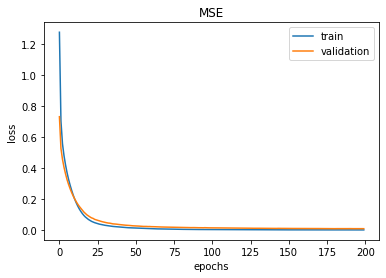

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='best')

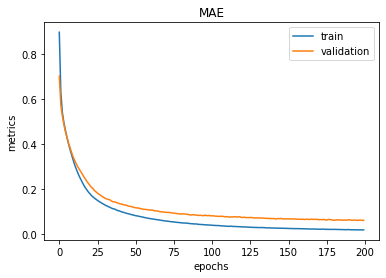

In [18]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.title('MAE')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='best')

In [19]:
model = keras.models.load_model('TPE_Wanhua_model-1.h5')
y_test = np.array(test_data[test_data.columns[-1]]).reshape(len(test_data),1)
test_data = (test_data - mean) / std
x_test = np.array(test_data[test_data.columns[0:61]])
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred * std['y'] + mean['y'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model Percentage Error: {:.2f}%".format(percentage_error))

9/9 [==============================] - 0s 1ms/step
Model Percentage Error: 1.45%


In [20]:
print(type(y_test))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
result = pd.concat([y_test, y_pred],axis=1)
result.to_csv('Wanhua_result.csv')

In [22]:
model.layers[0].get_config()

{'name': 'dense',
 'trainable': True,
 'batch_input_shape': (None, 61),
 'dtype': 'float32',
 'units': 61,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [23]:
model.layers[0].get_weights()

[array([[-0.05060112,  0.08244094,  0.01808137, ..., -0.01647636,
         -0.06215245, -0.15784012],
        [-0.05867434,  0.2009946 , -0.11521574, ..., -0.07799129,
         -0.04019281,  0.07518622],
        [-0.07871401, -0.18390942, -0.15658505, ..., -0.11084859,
         -0.11658657, -0.08282211],
        ...,
        [-0.12349522,  0.17342061,  0.04905861, ...,  0.01472009,
          0.11721064,  0.0956039 ],
        [-0.00072187,  0.00484065,  0.09530552, ...,  0.07447964,
          0.02832266, -0.102749  ],
        [-0.07814655,  0.30966935,  0.15215194, ...,  0.33220556,
         -0.00711016, -0.20723635]], dtype=float32),
 array([-0.00140004, -0.05916677, -0.04757927,  0.07288284, -0.06987528,
         0.00298767, -0.00225507,  0.00048326,  0.05139221,  0.03998386,
        -0.01607026,  0.06763311,  0.02041945, -0.00287436,  0.0320061 ,
         0.02256753,  0.06478629,  0.01188898,  0.04046424,  0.02143972,
        -0.02123497,  0.00105622,  0.01918201,  0.03888907, -0.025

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 61)                3782      
                                                                 
 dense_1 (Dense)             (None, 22)                1364      
                                                                 
 dense_2 (Dense)             (None, 1)                 23        
                                                                 
Total params: 5,169
Trainable params: 5,169
Non-trainable params: 0
_________________________________________________________________
None
